数据无缺失值。
支持向量机分类结果：
混淆矩阵：
[[ 11   8   1   0]
 [ 10 150  27   5]
 [  0  29 135  29]
 [  0   5  20  53]]

分类报告：
              precision    recall  f1-score   support

           0       0.52      0.55      0.54        20
           1       0.78      0.78      0.78       192
           2       0.74      0.70      0.72       193
           3       0.61      0.68      0.64        78

    accuracy                           0.72       483
   macro avg       0.66      0.68      0.67       483
weighted avg       0.73      0.72      0.72       483

决策树分类结果：
混淆矩阵：
[[ 15   4   1   0]
 [  3 152  32   5]
 [  0  21 145  27]
 [  0   4  13  61]]

分类报告：
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.84      0.79      0.82       192
           2       0.76      0.75      0.76       193
           3       0.66      0.78      0.71        78

    accuracy                           0.77       483
   macro avg       0.77      0.

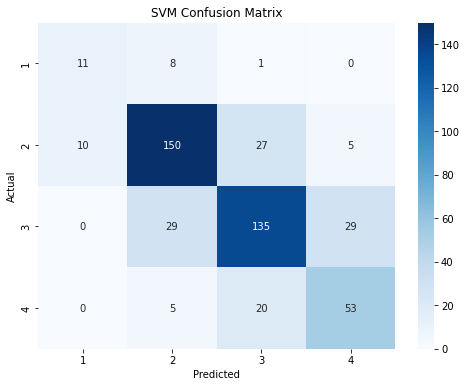

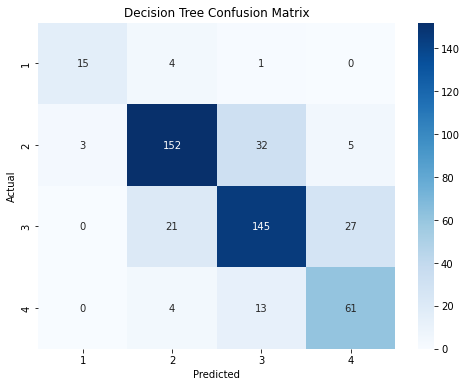

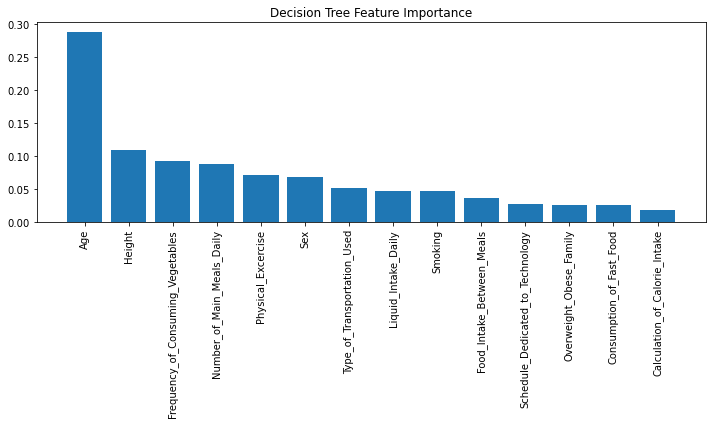

In [66]:
# 导入必要库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 忽略全局警告
import warnings
warnings.filterwarnings("ignore")

# 设置显示负号
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
# 读取数据
file_path = "Obesity_Dataset.xlsx"
data = pd.read_excel(file_path)

# 数据预处理
# 将目标变量"Class"编码为数字
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# 检查是否有缺失值
if data.isnull().sum().sum() > 0:
    print("数据包含缺失值，请处理！")
else:
    print("数据无缺失值。")

# 特征和目标分离
X = data.drop(columns=['Class'])
y = data['Class']

# 将分类变量编码为数值
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 支持向量机分类
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# 决策树分类
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# 评估支持向量机
print("支持向量机分类结果：")
print("混淆矩阵：")
print(confusion_matrix(y_test, svm_predictions))
print("\n分类报告：")
print(classification_report(y_test, svm_predictions))
# 评估决策树
print("决策树分类结果：")
print("混淆矩阵：")
print(confusion_matrix(y_test, tree_predictions))
print("\n分类报告：")
print(classification_report(y_test, tree_predictions))
# 绘制混淆矩阵热图函数
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()
# SVM混淆矩阵可视化
plot_confusion_matrix(y_test, svm_predictions, "SVM Confusion Matrix")

# 决策树混淆矩阵可视化
plot_confusion_matrix(y_test, tree_predictions, "Decision Tree Confusion Matrix")
# 绘制特征重要性函数
def plot_feature_importance(feature_names, importances, title):
    plt.figure(figsize=(10, 6))
    sorted_indices = np.argsort(importances)[::-1]
    plt.bar(range(len(importances)), importances[sorted_indices], align="center")
    plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
    plt.title(title)
    plt.tight_layout()
    plt.show()
# 决策树特征重要性可视化
if hasattr(tree_model, "feature_importances_"):
    feature_names = data.drop(columns=['Class']).columns
    plot_feature_importance(feature_names, tree_model.feature_importances_, 
"Decision Tree Feature Importance")
